In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

In [6]:
df_pre=pd.read_parquet('accident_vehicle_preprocessed.parquet')
df_pre.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [11]:
df=df_pre[df_pre['Accident_Severity']>0]
df['Accident_Severity'].value_counts()

1    59062
2     6695
Name: Accident_Severity, dtype: int64

In [10]:
df.shape

(65757, 49)

In [12]:
df2=df.copy()

In [13]:
#identify dependent and independent variables
X=df2.drop('Accident_Severity', axis=1)
y=df2.Accident_Severity

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [15]:
corr_matrix=df2.corr()
corr_matrix['Accident_Severity'].sort_values(ascending=False)

Accident_Severity                              1.000000
Speed_limit                                    0.173660
Number_of_Casualties                           0.130171
Number_of_Vehicles                             0.106255
Engine_Capacity_.CC.                           0.093761
LSOA_of_Accident_Location                      0.081420
Vehicle_Reference                              0.079013
Junction_Location                              0.077306
Vehicle_Leaving_Carriageway                    0.059012
Sex_of_Driver                                  0.051692
Police_Force                                   0.020087
Age_of_Driver                                  0.018710
Vehicle_Location.Restricted_Lane               0.015664
Road_Surface_Conditions                        0.014287
InScotland                                     0.013256
Latitude                                       0.008810
Driver_IMD_Decile                              0.008270
Was_Vehicle_Left_Hand_Drive                    0

# Model Implementation: Random Forest


ACCURACY OF THE MODEL:  0.9082268856447688


C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


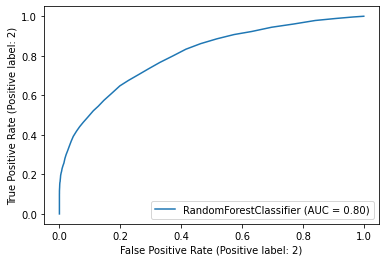

In [18]:
#models implementation and evaluation

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

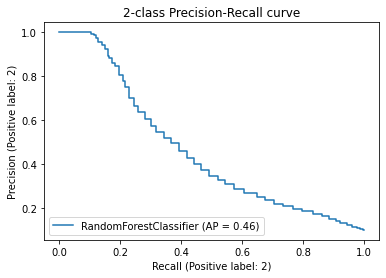

In [19]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RandomForestClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11802     1]
 [ 1206   143]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     11803
           2       0.99      0.11      0.19      1349

    accuracy                           0.91     13152
   macro avg       0.95      0.55      0.57     13152
weighted avg       0.92      0.91      0.87     13152



# Handling class imbalance

## Undersampling

In [22]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

ns=RandomUnderSampler(random_state=43)
X_train_ns, y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({1: 47259, 2: 5346})
The number of classes after ns Counter({1: 5346, 2: 5346})


In [23]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [25]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8172 3631]
 [ 392  957]]
              precision    recall  f1-score   support

           1       0.95      0.69      0.80     11803
           2       0.21      0.71      0.32      1349

    accuracy                           0.69     13152
   macro avg       0.58      0.70      0.56     13152
weighted avg       0.88      0.69      0.75     13152



## Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(random_state=43)
X_train_os, y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before os {}".format(Counter(y_train)))
print("The number of classes after os {}".format(Counter(y_train_os)))

The number of classes before os Counter({1: 47259, 2: 5346})
The number of classes after os Counter({1: 47259, 2: 47259})


In [27]:
classifier=RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [28]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11789    14]
 [ 1134   215]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     11803
           2       0.94      0.16      0.27      1349

    accuracy                           0.91     13152
   macro avg       0.93      0.58      0.61     13152
weighted avg       0.91      0.91      0.88     13152



## Easy Ensembler

In [30]:
from imblearn.ensemble import EasyEnsembleClassifier

ez=EasyEnsembleClassifier(random_state=110)
ez.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=110)

In [31]:
y_pred=ez.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7899 3904]
 [ 454  895]]
              precision    recall  f1-score   support

           1       0.95      0.67      0.78     11803
           2       0.19      0.66      0.29      1349

    accuracy                           0.67     13152
   macro avg       0.57      0.67      0.54     13152
weighted avg       0.87      0.67      0.73     13152



## ADASYN: Adaptive Synthetic Sampling

In [32]:
from imblearn.over_sampling import ADASYN

ada=ADASYN(random_state=130)
X_train_ada, y_train_ada=ada.fit_resample(X_train,y_train)
print("The number of classes before ada {}".format(Counter(y_train)))
print("The number of classes after ada {}".format(Counter(y_train_ada)))

The number of classes before ada Counter({1: 47259, 2: 5346})
The number of classes after ada Counter({1: 47259, 2: 46321})


In [33]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ada,y_train_ada)

RandomForestClassifier()

In [34]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11538   265]
 [ 1109   240]]
              precision    recall  f1-score   support

           1       0.91      0.98      0.94     11803
           2       0.48      0.18      0.26      1349

    accuracy                           0.90     13152
   macro avg       0.69      0.58      0.60     13152
weighted avg       0.87      0.90      0.87     13152



## SMOTE

In [35]:
from imblearn.over_sampling import SMOTE

smt=SMOTE(random_state=43,n_jobs=-1)
X_train_smt, y_train_smt=smt.fit_resample(X_train,y_train)
print("The number of classes before smt {}".format(Counter(y_train)))
print("The number of classes after smt {}".format(Counter(y_train_smt)))

The number of classes before smt Counter({1: 47259, 2: 5346})
The number of classes after smt Counter({1: 47259, 2: 47259})


In [36]:
classifier=RandomForestClassifier()
classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [37]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11540   263]
 [ 1115   234]]
              precision    recall  f1-score   support

           1       0.91      0.98      0.94     11803
           2       0.47      0.17      0.25      1349

    accuracy                           0.90     13152
   macro avg       0.69      0.58      0.60     13152
weighted avg       0.87      0.90      0.87     13152



# Hyperparameter Tuning

## GridSearchCV

In [38]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

In [39]:
#from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV, KFold


rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remo

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [40]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [62]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')

In [63]:
rfc1.fit(X_train, y_train)

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=200,
                       random_state=42)

In [64]:
pred=rfc1.predict(X_test)

In [65]:
print("Accuracy for Random Forest on CV data: ",metrics.accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy for Random Forest on CV data:  0.8997110705596107
[[11803     0]
 [ 1319    30]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     11803
           2       1.00      0.02      0.04      1349

    accuracy                           0.90     13152
   macro avg       0.95      0.51      0.50     13152
weighted avg       0.91      0.90      0.85     13152



# Undersampling on best parameters

In [66]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

ns=RandomUnderSampler(random_state=43)
X_train_ns, y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({1: 47259, 2: 5346})
The number of classes after ns Counter({1: 5346, 2: 5346})


In [67]:
rfc1.fit(X_train_ns,y_train_ns)

C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=6, max_features='auto', n_estimators=200,
                       random_state=42)

In [68]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11540   263]
 [ 1115   234]]
              precision    recall  f1-score   support

           1       0.91      0.98      0.94     11803
           2       0.47      0.17      0.25      1349

    accuracy                           0.90     13152
   macro avg       0.69      0.58      0.60     13152
weighted avg       0.87      0.90      0.87     13152

